# Introduction to AutoDoc

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.cloud import bigquery

# Initialize client with project ID
client = bigquery.Client(project='sccm-datathon-2025-participant')

## Datasets

Autodoc comprises of videos and annotations, stored in a Google Cloud Bucket, and structured information tables, stored in BigQuery.

### Google Cloud Bucket

A storage bucket named `sccm--autodoc2025` is located at: https://console.cloud.google.com/storage/browser/sccm--autodoc2025.

The bucket contains:

1. Videos of simulated trauma casualty care. See this video as an example: https://storage.cloud.google.com/sccm--autodoc2025/migrated_video/31e5ca7d-67d1-42bc-9699-a975f860c997.mp4

2. Annotations (for most videos) defining the start and stop times of treatments, for example:


| Task                                | ICTL Number     | Skill Start Time | Skill End Time | Time on Task | Notes                                                                                          | Medication | Dosage | Route | Body Location | Anatomical Location | Sagittal Location | Provider | Casualty | Abandonment | Reviewer Initials | Date (MM/DD/YYYY) |
|-------------------------------------|------------------|-------------------|----------------|--------------|------------------------------------------------------------------------------------------------|------------|--------|-------|----------------|----------------------|-------------------|----------|----------|-------------|--------------------|--------------------|
| StartEx                             |                  | 0:00:00           | 0:00:16        | 0:00:16      |                                                                                                |            |        |       |                |                      |                   |          |          |             |                    |                    |
| Time Sync                           |                  | 0:00:15           | 0:00:15        | 0:00:00      |                                                                                                |            |        |       |                |                      |                   |          |          |             |                    |                    |
| Tourniquet Application              | 081-000-0048     | 0:00:31           | 0:01:24        | 0:00:53      | Leg still bleeding.                                                                            |            |        |       | Thigh          |                      | Right             |          |          |             |                    |                    |
| Chest Seal Application              | 081-COM-0069     | 0:01:41           | 0:03:25        | 0:01:44      | Abandons to pack wound, but comes back to finish chest seal.                                  |            |        |       | Chest          | Anterior             | Left              |          |          |             |                    |                    |
| Junctional Wound Packing            | 081-68W-0081     | 0:01:48           | 0:04:49        | 0:03:01      | Grabs junctional tourniquet (hip binder) instead of an ETB.                                   |            |        |       | Groin          | Anterior             | Left              |          |          |             |                    |                    |
| Treat a Casualty with Pelvic Fracture | 081-000-0111   | 0:02:41           | 0:04:57        | 0:02:16      | Uses the pelvic binder as a junctional tourniquet                                              |            |        |       | Pelvis         |                      |                   |          |          |             |                    |                    |
| Nasopharyngeal Airway               | 081-COM-1023     | 0:05:00           | 0:05:16        | 0:00:16      |                                                                                                |            |        |       | Face           | Anterior             | Right             |          |          |             |                    |                    |
| Junctional Wound Packing            | 081-68W-0081     | 0:05:26           | 0:11:15        | 0:05:49      | Goes to pack an exterior wound with gauze, but decides to wrap with ETB instead. No packing.  |            |        |       |                |                      |                   |          |          | Y           |                    |                    |
| Pressure Dressing Application       | 081-000-0110     | 0:05:47           | 0:11:15        | 0:05:28      | No stop cue reached. Distal pulse not checked.                                                 |            |        |       | Thigh          |                      | Right             |          |          | Y           |                    |                    |
| Manage a Minor Laceration           | 081-000-0051     | 0:07:35           | 0:08:28        | 0:00:53      | Head wrapping with gauze. Not a minor laceration, but going with this task for now.           |            |        |       | Face           |                      |                   |          |          |             |                    |                    |
| Chest Needle Decompression          | 081-000-0037     | 0:08:58           | 0:09:58        | 0:01:00      |                                                                                                |            |        |       | Chest          | Anterior             | Left              |          |          |             |                    |                    |
| ENDEX                               |                  | 0:11:10           | 0:11:15        | 0:00:05      |                                                                                                |            |        |       |                |                      |                   |          |          |             |                    |                    |



### BigQuery

Five tables on BigQuery at https://console.cloud.google.com/bigquery?project=sccm-discovery. These tables contain structured information about each simulation:

  - `Annotations`: A log of annotations associated with each simulation, capturing time-stamped events and actions.
  - `Casualty List`: Defines each casualty as a combination of treatments performed during a simulation. A casualty represents a specific clinical presentation.
  - `Device List`: Contains information about the recording devices used in simulations (e.g., GoPro, MOHOC2).
  - `Scenario List`: Describes each scenario, which defines the set of casualties included in a potential simulation. In this dataset, each simulation involves a single casualty, though other datasets may include multiple casualties per scenario.
  - `Simulation List`: Represents the actual recorded simulation event, where a medic or volunteer performs trauma care based on the scenario.
  - `Treatment List`: Enumerates possible treatments, each mapped to standardized SNOMED codes and clinical terms.

The following code will walk through loading 4 data of these tables and joining them in order to determine what treatments have been performed across the all video simulations and how many of each treatment have been done cumulatively.

In [ ]:
# project_id = 'sccm-datathon-2025-participant'
dataset_id = 'AutoDoc'
table_id = 'Casualty List'

# Construct the query using the full project.dataset.table path
query = f"SELECT * FROM `sccm-discovery.{dataset_id}.{table_id}` LIMIT 1000"
df = client.query(query).to_dataframe()

display(df.head())

,pd_id,redcap_repeat_instrument,redcap_repeat_instance,pd_name,pd_description,pd_status,pd_experimental,casualty_complete,scn_injuryid,scn_injury_alid,...,scn_trtmt_type,scn_trtmt_alid,associated_treatment_complete,scn_attach_type,scn_attach_type_other,scn_attach_ra_type,scn_attach_label,scn_attach_display,scn_attach_file,document_complete
0,1,None,<NA>,11060 1,You will be performing several interventions o...,None,None,None,None,None,...,None,None,<NA>,None,None,None,None,None,None,None
1,2,None,<NA>,11060 2,You will be performing several interventions o...,None,None,None,None,None,...,None,None,<NA>,None,None,None,None,None,None,None
2,3,None,<NA>,11060 3,You will be performing several interventions o...,None,None,None,None,None,...,None,None,<NA>,None,None,None,None,None,None,None
3,4,None,<NA>,11060 4,You will be performing several interventions o...,None,None,None,None,None,...,None,None,<NA>,None,None,None,None,None,None,None
4,5,None,<NA>,11060 5,You will be performing several interventions o...,None,None,None,None,None,...,None,None,<NA>,None,None,None,None,None,None,None


In [ ]:

query = f"""
SELECT COUNT(DISTINCT file_id) AS unique_file_ids
FROM `sccm-discovery.AutoDoc.Annotations`;

"""
client.query(query).to_dataframe()

,unique_file_ids
0,76


In [ ]:
query = f"""
WITH filtered AS (
  SELECT
    file_id,
    task,
    TIME(`skill_start_time_hh:mm:ss`) AS skill_time
  FROM
    `sccm-discovery.AutoDoc.Annotations`
  WHERE
    task IN ('StartEx', 'ENDEX')
),

pivoted AS (
  SELECT
    file_id,
    MAX(CASE WHEN task = 'StartEx' THEN skill_time END) AS start_time,
    MAX(CASE WHEN task = 'ENDEX' THEN skill_time END) AS end_time
  FROM
    filtered
  GROUP BY
    file_id
)

SELECT
  file_id,
  start_time,
  end_time,
  TIME_DIFF(end_time, start_time, SECOND) AS duration_seconds
FROM
  pivoted
WHERE
  start_time IS NOT NULL AND end_time IS NOT NULL

"""
client.query(query).to_dataframe()

,file_id,start_time,end_time,duration_seconds
0,42,00:00:00,00:08:15,495
1,33,00:00:00,00:07:51,471
2,75,00:00:00,00:06:22,382
3,59,00:00:00,00:26:24,1584
4,28,00:00:00,00:00:52,52
...,...,...,...,...
58,39,00:00:00,00:06:57,417
59,53,00:00:00,00:05:25,325
60,6,00:00:00,00:14:37,877
61,15,00:00:00,00:00:57,57


In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
# prompt: charactize the column duration_seconds

import pandas as pd

# Assuming 'df' is the dataframe containing the 'duration_seconds' column

# Basic characterization
print("Characterization of 'duration_seconds' column:")
print(df['duration_seconds'].describe())

# Check for missing values
print("\nMissing values:")
print(df['duration_seconds'].isnull().sum())

# Data type
print("\nData type:")
print(df['duration_seconds'].dtype)

# Distribution (if applicable)
if pd.api.types.is_numeric_dtype(df['duration_seconds']):
    print("\nDistribution:")
    print(df['duration_seconds'].value_counts(bins=10).sort_index()) # Binning for numerical columns
else:
    print("\nValue Counts:")
    print(df['duration_seconds'].value_counts()) # For non-numerical columns

Characterization of 'duration_seconds' column:
count          63.0
mean     533.746032
std      468.015576
min            12.0
25%           234.0
50%           417.0
75%           678.0
max          1841.0
Name: duration_seconds, dtype: Float64

Missing values:
0

Data type:
Int64

Distribution:
(10.17, 194.9]      13
(194.9, 377.8]      15
(377.8, 560.7]      13
(560.7, 743.6]      10
(743.6, 926.5]       5
(926.5, 1109.4]      0
(1109.4, 1292.3]     1
(1292.3, 1475.2]     0
(1475.2, 1658.1]     2
(1658.1, 1841.0]     4
Name: count, dtype: int64


<Axes: >

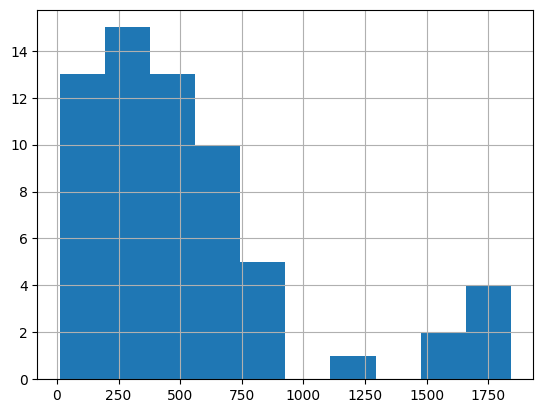

In [ ]:
df.duration_seconds.hist()

In [ ]:
# Load the 'Treatment List' table
dataset_id = 'AutoDoc'
treatment_list_table_id = 'Treatment List'
query_treatment = f"SELECT * FROM `sccm-discovery.{dataset_id}.{treatment_list_table_id}` LIMIT 1000"
treatment_df = client.query(query_treatment).to_dataframe()
display(treatment_df.head())

,treatment_id,trtmt_type,trtmt_treatment,trtmt_add_info,trtmt_vconcept,trtmt_vsrc,trtmt_other_vsrc,trtmt_vcval,trtmt_vsrc_url,treatment_complete
0,19,None,Administer Medication (general),None,Administration of drug or medicament (procedure),snomed,None,18629005,http://snomed.info/sct,2
1,26,None,Documentation of Care,None,Documentation procedure (procedure),snomed,None,23745001,http://snomed.info/sct,2
2,5,A,Nasopharyngeal Airway,None,Nasopharyngeal Airway Insertion (procedure),snomed,None,182692007,http://snomed.info/sct,2
3,6,A,Oropharyngeal airway,None,Insertion of oropharyngeal airway (procedure),snomed,None,7443007,http://snomed.info/sct,2
4,7,A,Extraglottic airway,None,Insertion of esophageal tracheal double lumen ...,snomed,None,427753009,http://snomed.info/sct,2


In [ ]:
# Load the 'Scenario List' table
dataset_id = 'AutoDoc'
scenario_list_table_id = 'Scenario List'
query_scenario = f"SELECT * FROM `sccm-discovery.{dataset_id}.{scenario_list_table_id}` LIMIT 1000"
scenario_df = client.query(query_scenario).to_dataframe()
display(scenario_df.head())

,pd_id,redcap_repeat_instrument,redcap_repeat_instance,pd_name,pd_description,pd_num_casualties,pd_num_medics,pd_status,pd_experimental,scenario_complete,...,scn_ac_init_triage_cat,scn_ac_evacpriority,associated_casualty_complete,scn_attach_type,scn_attach_type_other,scn_attach_ra_type,scn_attach_label,scn_attach_display,scn_attach_file,document_complete
0,1,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None
1,2,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None
2,3,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None
3,4,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None
4,5,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None


In [ ]:
# Load the 'Simulation Data' table
dataset_id = 'AutoDoc'
simulation_data_table_id = 'Simulation Data'
query_simulation = f"SELECT * FROM `sccm-discovery.{dataset_id}.{simulation_data_table_id}` LIMIT 1000"
simulation_df = client.query(query_simulation).to_dataframe()
display(simulation_df.head())

,ad_id,redcap_repeat_instrument,redcap_repeat_instance,sim_migrated,sim_migrated_name,sim_mascal,ad_starttime,ad_endtime,ad_usecontext,ad_location,...,pd_debrief_ans,pb_thoughts,pb_thoughts_ans,pd_phase_participated,pd_phase_participated_ans,pd_realism,pd_realism_ans,pd_comment_completion,pd_comment_completion_ans,participant_debrief_complete
0,1,None,<NA>,1,46,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None
1,2,None,<NA>,1,47,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None
2,3,None,<NA>,1,51,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None
3,4,None,<NA>,1,52,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None
4,5,None,<NA>,1,53,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
query = "select sim_fileref_filename FROM `sccm-discovery.AutoDoc.Simulation Data` LIMIT 10"
client.query(query).to_dataframe()

,sim_fileref_filename
0,None
1,None
2,None
3,None
4,None
5,None
6,None
7,None
8,None
9,None


In [ ]:
query = "SELECT task, COUNT(*) as count FROM sccm-discovery.AutoDoc.Annotations GROUP BY task ORDER BY count DESC LIMIT 10"
client.query(query).to_dataframe()

,task,count
0,Chest Seal Application,85
1,Tourniquet Application,70
2,StartEx,66
3,Time Sync,65
4,ENDEX,64
5,Nasopharyngeal Airway,62
6,Chest Needle Decompression,58
7,Documentation,54
8,Administer Medication,42
9,Initiate an IV,41


In [ ]:
# Load the 'Treatment List' table
dataset_id = 'AutoDoc'
treatment_list_table_id = 'Treatment List'
query_treatment = f"SELECT * FROM `sccm-discovery.{dataset_id}.{treatment_list_table_id}` LIMIT 1000"
treatment_df = client.query(query_treatment).to_dataframe()
display(treatment_df.head())

,treatment_id,trtmt_type,trtmt_treatment,trtmt_add_info,trtmt_vconcept,trtmt_vsrc,trtmt_other_vsrc,trtmt_vcval,trtmt_vsrc_url,treatment_complete
0,19,None,Administer Medication (general),None,Administration of drug or medicament (procedure),snomed,None,18629005,http://snomed.info/sct,2
1,26,None,Documentation of Care,None,Documentation procedure (procedure),snomed,None,23745001,http://snomed.info/sct,2
2,5,A,Nasopharyngeal Airway,None,Nasopharyngeal Airway Insertion (procedure),snomed,None,182692007,http://snomed.info/sct,2
3,6,A,Oropharyngeal airway,None,Insertion of oropharyngeal airway (procedure),snomed,None,7443007,http://snomed.info/sct,2
4,7,A,Extraglottic airway,None,Insertion of esophageal tracheal double lumen ...,snomed,None,427753009,http://snomed.info/sct,2


In [ ]:
# Load the 'Scenario List' table
dataset_id = 'AutoDoc'
scenario_list_table_id = 'Scenario List'
query_scenario = f"SELECT * FROM `sccm-discovery.{dataset_id}.{scenario_list_table_id}` LIMIT 1000"
scenario_df = client.query(query_scenario).to_dataframe()
display(scenario_df.head())

,pd_id,redcap_repeat_instrument,redcap_repeat_instance,pd_name,pd_description,pd_num_casualties,pd_num_medics,pd_status,pd_experimental,scenario_complete,...,scn_ac_init_triage_cat,scn_ac_evacpriority,associated_casualty_complete,scn_attach_type,scn_attach_type_other,scn_attach_ra_type,scn_attach_label,scn_attach_display,scn_attach_file,document_complete
0,1,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None
1,2,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None
2,3,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None
3,4,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None
4,5,associated_casualty,1,None,None,None,None,None,None,None,...,None,None,0,None,None,None,None,None,None,None


In [ ]:
# Load the 'Simulation Data' table
dataset_id = 'AutoDoc'
simulation_data_table_id = 'Simulation Data'
query_simulation = f"SELECT * FROM `sccm-discovery.{dataset_id}.{simulation_data_table_id}` LIMIT 1000"
simulation_df = client.query(query_simulation).to_dataframe()
display(simulation_df.head())

,ad_id,redcap_repeat_instrument,redcap_repeat_instance,sim_migrated,sim_migrated_name,sim_mascal,ad_starttime,ad_endtime,ad_usecontext,ad_location,...,pd_debrief_ans,pb_thoughts,pb_thoughts_ans,pd_phase_participated,pd_phase_participated_ans,pd_realism,pd_realism_ans,pd_comment_completion,pd_comment_completion_ans,participant_debrief_complete
0,1,None,<NA>,1,46,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None
1,2,None,<NA>,1,47,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None
2,3,None,<NA>,1,51,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None
3,4,None,<NA>,1,52,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None
4,5,None,<NA>,1,53,0,None,None,1,1,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Join the dataframes
# Start with the Casualty List (df) as the base, as treatments are linked to casualties
merged_df = df.merge(treatment_df, left_on='scn_trtmtid', right_on='treatment_id', how='left')

# Merge with Scenario List (scenario_df)
merged_df = merged_df.merge(scenario_df, left_on='pd_id', right_on='scn_ac_casualtyid', how='left')

# Merge with Simulation Data (simulation_df)
merged_df = merged_df.merge(simulation_df, left_on='pd_id_x', right_on='ad_id', how='left')

# Display the head of the merged dataframe to verify
display(merged_df.head())

,pd_id_x,redcap_repeat_instrument_x,redcap_repeat_instance_x,pd_name_x,pd_description_x,pd_status_x,pd_experimental_x,casualty_complete,scn_injuryid,scn_injury_alid,...,pd_debrief_ans,pb_thoughts,pb_thoughts_ans,pd_phase_participated,pd_phase_participated_ans,pd_realism,pd_realism_ans,pd_comment_completion,pd_comment_completion_ans,participant_debrief_complete
0,1,None,<NA>,11060 1,You will be performing several interventions o...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,None,<NA>,11060 1,You will be performing several interventions o...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1,None,<NA>,11060 1,You will be performing several interventions o...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1,None,<NA>,11060 1,You will be performing several interventions o...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1,None,<NA>,11060 1,You will be performing several interventions o...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Remove duplicate treatments within each simulation
# Assuming a duplicate treatment is identified by the same ad_id and trtmt_vconcept
unique_treatments = merged_df.drop_duplicates(subset=['ad_id', 'trtmt_vconcept'])

# Count the occurrences of each unique treatment type across all simulations
treatment_type_summary = unique_treatments.groupby('trtmt_vconcept').size().reset_index(name='total_count_across_simulations')

# Rename the columns for clarity
treatment_type_summary.columns = ['treatment_type', 'total_count_across_simulations']

# Display the summary
display(treatment_type_summary)

,treatment_type,total_count_across_simulations
0,Administration of blood product (procedure),1
1,Administration of drug or medicament (procedure),14
2,Administration of intravenous fluids (procedure),10
3,Airway suction technique (procedure),2
4,"Application of Dressing, Pressure (procedure)",28
5,Application of dressing for burn (procedure),3
6,"Application of dressing, occlusive plastic (pr...",48
7,Application of pressure binder (procedure),4
8,Application of tourniquet (procedure),41
9,Catheterization of vein (procedure),28


by creating an interactive table, we can observe that the most common treatments in the database are:
"Application of dressing, occlusive plastic (procedure)" with 48 observed across all simulations. If you go back to the Treatment List table  you can see that this is more commonly referred to as application of a chest seal.

This table also tells us that some treatments such as, administration of blood product and airway suctioning, are not observed very frequently and may not be good choices for developing models at this time.